In [1]:
import numpy as np
import pandas as pd

In [3]:
#1. 랜덤으로 5개의정수를 만들어 시리즈로 생성하기

a= np.random.randint(100, size=5)
s= pd.Series(a)
s

0    91
1    57
2    13
3    64
4    42
dtype: int32

In [4]:
#2. 랜덤으로 5개의 실수를 만들어 시리즈로 생성하기
b = np.random.rand(5)
z = pd.Series(b)
z

0    0.959068
1    0.920434
2    0.654960
3    0.064218
4    0.239422
dtype: float64

In [5]:
#3. 혈액형 통계 수치를 이용하여 인덱스를 가지는 시리즈 생성하기
blood_pct = [28, 34, 27, 11]
blood = ['O형', 'A형', 'B형', 'AB형']
s_blood = pd.Series(blood_pct, index=blood)
s_blood

O형     28
A형     34
B형     27
AB형    11
dtype: int64

In [6]:
#4. 1 ~ 25숫자를 가지는 DataFrame만들기
k = pd.DataFrame(np.arange(1,26).reshape(5, 5))
k

,0,1,2,3,4
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20
4,21,22,23,24,25


In [7]:
#5. DataFrame만들기
data = (15, 1, 'a', 100), (16, 2, 'b', 90), (15, 3, 'c', 80), (14, 4, 'd', 70)
column = ['나이', '번호', '이름', '점수']

l = pd.DataFrame(data=data, columns=column)
l

,나이,번호,이름,점수
0,15,1,a,100
1,16,2,b,90
2,15,3,c,80
3,14,4,d,70


In [53]:
## http://blog.daum.net/revisioncrm/460

cust = pd.DataFrame({'age' : np.arange(30,51), 'sales' : np.repeat([65,60,80],7)})
freq = np.repeat([3,7,4,2,1,1,2],3)
# sales는 각 고객별 총판매금액이며 freq는 구매횟수이다.
freq

array([3, 3, 3, 7, 7, 7, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2])

In [76]:
# 문제1: 고객의 수를 계산하라
# len(cust) 
cust.count()

age      21
sales    21
dtype: int64

In [39]:
# 고객의 나이를 큰값에서 작은 값의 순서로 정렬하라
cust.sort_values('age', ascending=False).head()

,age,sales
20,50,80
19,49,80
18,48,80
17,47,80
16,46,80


In [33]:
# 고객의 나이 중 두번째로 큰 값은 얼마인가?
df1=cust.sort_values('age', ascending=False)
df1[1:2]

,age,sales
19,49,80


In [66]:
## 문제4: sales의 평균값은 얼마인가?
print('sales 평균값:',cust['sales'].mean())
# cust.describe()

## 문제5: 각 고객별로 sales와 전체고객의 sales 평균간의 차이는 얼마인가?
print('표준편차:',cust['sales'].describe()['std'])

## 문제6: cust dataframe에 freq를 걸럼으로 추가한 후 처음부터 3명의 고객을 출력하라.
freq1=pd.DataFrame({'freq':freq})
cust_df=pd.concat([cust,freq1] ,axis=1)
cust_df[:3]

sales 평균값: 68.33333333333333
표준편차: 8.70823365174209


,age,sales,freq
0,30,65,3
1,31,65,3
2,32,65,3


In [83]:
## 문제7: 고객별 구매1건당 평균 sales 금액을 구하여 avgsales 라는 이름의 컬럼으로 cust dataframe에 추가한 후 마지막 두 명의  고객을 출력하라.
cust_df['avgsales']=cust_df['sales']/cust_df['freq']
print(cust_df.tail(2))

## 문제8: cust dataframe을 avgsales 순서로 정렬하고, avgsales가 가장 큰 세명의 고객을 출력하라.
cust_df.sort_values('avgsales', ascending=False).head(3)
# cust_df

    age  sales  freq  avgsales
19   49     80     2      40.0
20   50     80     2      40.0


,age,sales,freq,avgsales
17,47,80,1,80.0
16,46,80,1,80.0
15,45,80,1,80.0


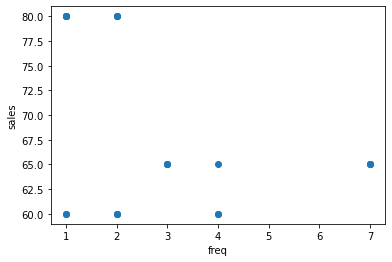

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
## 문제9: 고객의 freq와 sales간의 분포를 scatter plot으로 작성하라.
plt.scatter(cust_df['freq'], cust_df['sales'])
plt.xlabel('freq')
plt.ylabel('sales')
plt.show()

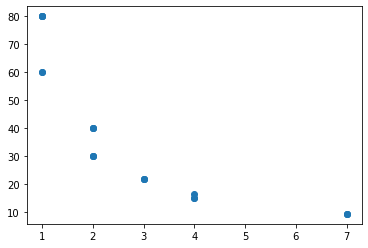

In [89]:
## 문제10 : freq와 평균sales간의 관계를 scatterplot을 이용하여 시각화하고 점들간의 분포를 보여주는 폴리노미얼 추세선을 추가하라. 동일 좌표에 복수의 점이 존재할 수 있으므로 jitter 함수를 이용하여 복수의 점이 존재하는지를 scatterplot에 반영하라. 결과는 다음의 챠트와 같은 모습이 되어야 한다

plt.scatter(cust_df['freq'], cust_df['avgsales'])
# plt.xlabel('freq')
# plt.ylabel('avgsales')
# plt.show()

## 문제11: 문제 10의 결과에서 40대인 고객들만 red color로 점을 표시하라



## 문제12: 고객리스트에 동일하게 36세이며 두 번에 걸쳐 총 55를 구매한 고객을 세 명 추가한 후 문제 11과 같은 형식의 scatter plot을 작성하라